In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator

In [3]:
url='https://raw.githubusercontent.com/saahil-jain/Benchmarking_Of_NODE/master/Time%20Series%20Forecasting/datasets/data.csv'
covid_records = pd.read_csv(url,sep=",") 
covid_records

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
21542,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21543,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
21544,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21545,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [4]:
list_of_countries=['United_Kingdom', 'Germany', 'Spain', 'Italy', 'United_States_of_America', 'India']

In [5]:
def gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.pow(error, 2)

CASES

In [8]:
grouped=covid_records.groupby('countriesAndTerritories')
country_population = {}
country_cases={}
for country in list_of_countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
  list_cases=list(abs(covid_records["cases"].loc[covid_records["countriesAndTerritories"]==country]))[::-1]
  length=len(list_cases)
  flag =0
  for number in list_cases:
    if number==0:
      continue
    else:
      flag=list_cases.index(number)
      break
  list_cases=list_cases[flag::]
  normalised_list_cases=[]
  for i in list_cases:
    normalised_list_cases.append((i*1000000)/country_population[country])
  list_days=list(range(flag,length))
  country_cases[country]={"cases":normalised_list_cases,"days":list_days}

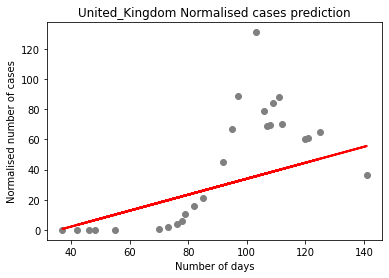

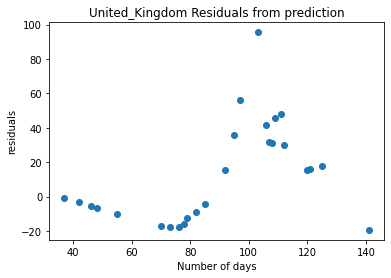

Root Mean Squared Error: 31.422794440421754
R squared value 0.2982101415854721
29.82101415854721


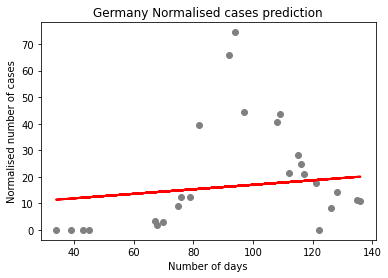

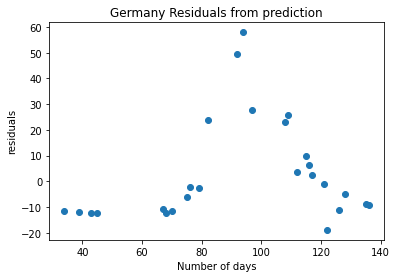

Root Mean Squared Error: 19.782798520348084
R squared value 0.036579503808198854
3.6579503808198854


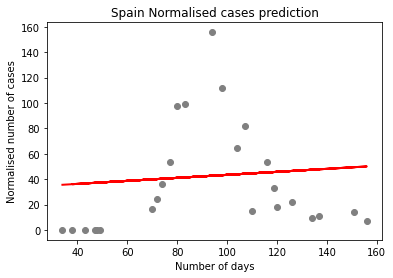

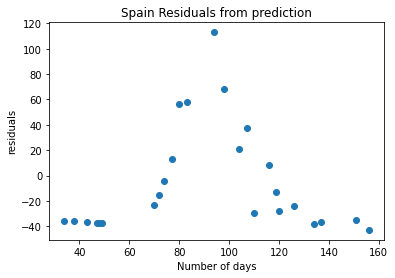

Root Mean Squared Error: 41.57735027317439
R squared value 0.0006636156347691324
0.06636156347691324


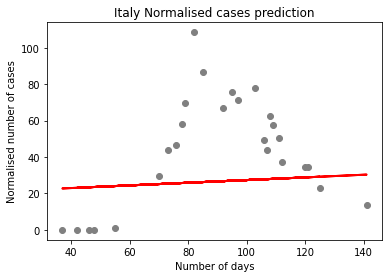

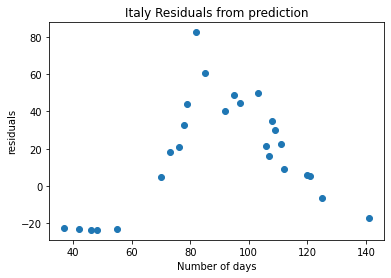

Root Mean Squared Error: 33.518835486159894
R squared value -0.3092429610751479
-30.92429610751479


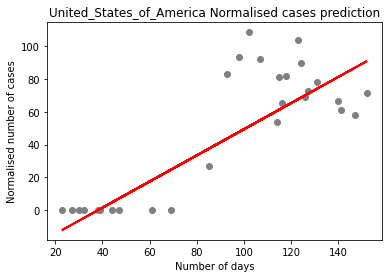

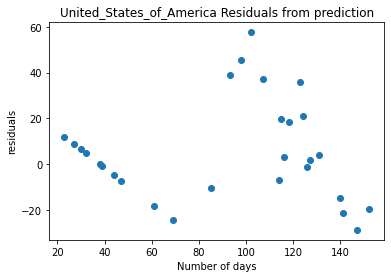

Root Mean Squared Error: 22.444022414975773
R squared value 0.6713045108338549
67.1304510833855


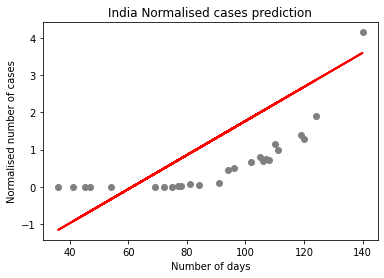

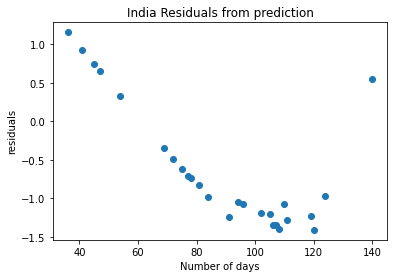

Root Mean Squared Error: 1.0105143337171547
R squared value -0.30830816073913114
-30.830816073913113
CPU times: user 1.6 s, sys: 36 ms, total: 1.64 s
Wall time: 1.63 s


In [13]:
%%time
#linear regression model for cases 
for country in list_of_countries:
  dict_cases=country_cases[country]
  df_current=pd.DataFrame(dict_cases,columns=["cases","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["cases"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

  w = np.random.randn(2)
  alpha = 0.5
  tolerance = 1e-5

  model=LinearRegression()
  train=model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  df_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

  plt.scatter(X_test, y_test,  color='gray')
  plt.plot(X_test, y_pred, color='red', linewidth=2)
  plt.title(country+" Normalised cases prediction")
  plt.xlabel("Number of days")
  plt.ylabel("Normalised number of cases")
  plt.show() 

  residuals=y_test-y_pred
  plt.plot(X_test,residuals,'o')
  plt.title(country+" Residuals from prediction")
  plt.xlabel("Number of days")
  plt.ylabel("residuals")
  plt.show()
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print("R squared value",r2_score(y_test,y_pred))

  accuracy=model.score(X_test,y_test)
  print(accuracy*100)

  

DEATHS


In [17]:
grouped=covid_records.groupby('countriesAndTerritories')
country_population = {}
country_deaths={}
for country in list_of_countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
  list_deaths=list(abs(covid_records["deaths"].loc[covid_records["countriesAndTerritories"]==country]))[::-1]
  length=len(list_deaths)
  flag =0
  for number in list_deaths:
    if number==0:
      continue
    else:
      flag=list_deaths.index(number)
      break
  list_deaths=list_deaths[flag::]
  normalised_list_deaths=[]
  for i in list_deaths:
    normalised_list_deaths.append((i*1000000)/country_population[country])
  list_days=list(range(flag,length))
  country_deaths[country]={"deaths":normalised_list_deaths,"days":list_days}

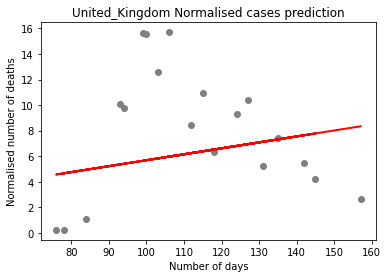

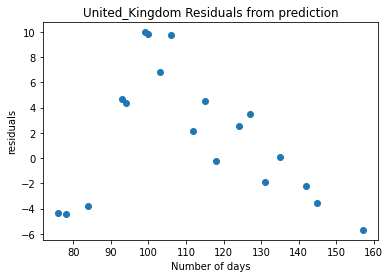

Root Mean Squared Error: 5.281812828505843
R squared value -0.18342716570386774
-18.342716570386774


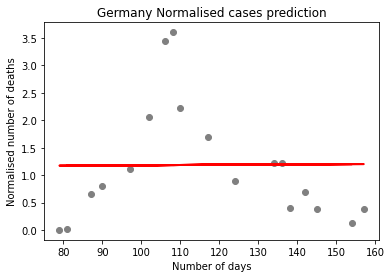

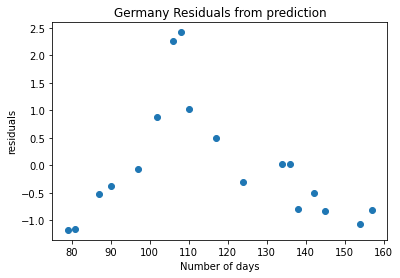

Root Mean Squared Error: 1.0439615306254455
R squared value -0.003403924315663165
-0.3403924315663165


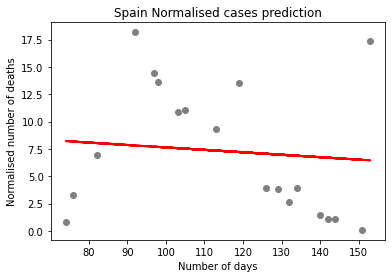

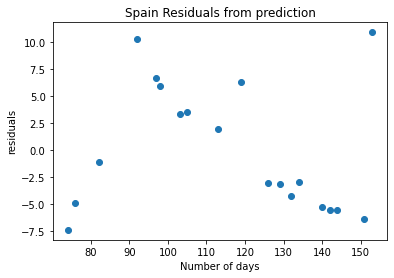

Root Mean Squared Error: 5.773277531335816
R squared value 0.038950352213177664
3.8950352213177664


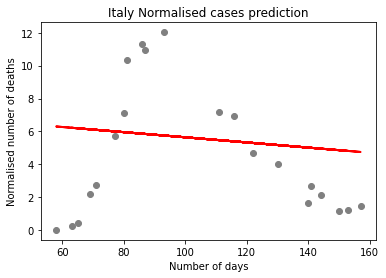

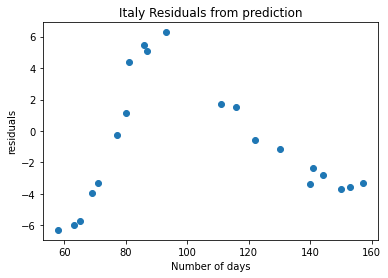

Root Mean Squared Error: 3.898972110980865
R squared value -0.026486977392131905
-2.64869773921319


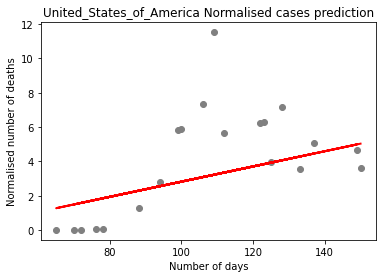

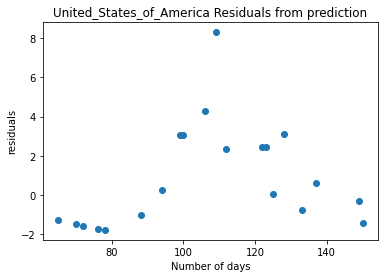

Root Mean Squared Error: 2.7366346527609076
R squared value 0.20278004701348795
20.278004701348795


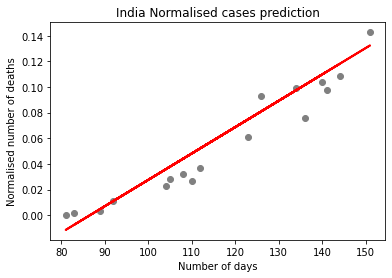

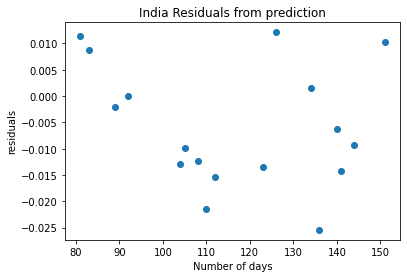

Root Mean Squared Error: 0.012691459455825527
R squared value 0.9159169249391803
91.59169249391803
CPU times: user 1.66 s, sys: 40.1 ms, total: 1.7 s
Wall time: 1.7 s


In [18]:
%%time
for country in list_of_countries:
  dict_deaths=country_deaths[country]
  df_current=pd.DataFrame(dict_deaths,columns=["deaths","days"])
  X=df_current["days"].values.reshape(-1,1)
  y=df_current["deaths"].values.reshape(-1,1)
  X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=40)

  w = np.random.randn(2)
  alpha = 0.5
  tolerance = 1e-5

  model=LinearRegression()
  train=model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  df_comp = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

  plt.scatter(X_test, y_test,  color='gray')
  plt.plot(X_test, y_pred, color='red', linewidth=2)
  plt.title(country+" Normalised cases prediction")
  plt.xlabel("Number of days")
  plt.ylabel("Normalised number of deaths")
  plt.show() 

  residuals=y_test-y_pred
  plt.plot(X_test,residuals,'o')
  plt.title(country+" Residuals from prediction")
  plt.xlabel("Number of days")
  plt.ylabel("residuals")
  plt.show()
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print("R squared value",r2_score(y_test,y_pred))

  accuracy=model.score(X_test,y_test)
  print(accuracy*100)